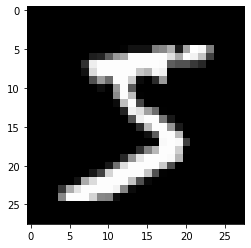

In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap="gray")

In [2]:
x_train[0].shape

(28, 28)

In [3]:
28*28

784

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# rescale to between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
encoder_input_conv = keras.Input(shape=(28,28,1), name='img')

x = keras.layers.Conv2D(16, (3, 3), padding="same", activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(encoder_input_conv)
x = keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu")(x)
encoder_output_conv = keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

encoder = keras.Model(encoder_input_conv, encoder_output_conv, name='encoder')

decoder_input_conv = keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu")(encoder_output_conv)
x = keras.layers.UpSampling2D(size=(2, 2))(decoder_input_conv)
x = keras.layers.Conv2D(8, (3, 3), padding="same", activation="relu")(x)
x = keras.layers.UpSampling2D(size=(2, 2))(x)
decoder_output_conv = keras.layers.Conv2D(1, (3, 3), padding="same", activation="relu")(x)

autoencoder_conv = keras.Model(encoder_input_conv, decoder_output_conv, name='autoencoder_conv')



optimizer = keras.optimizers.Adam()

autoencoder_conv.compile(optimizer, loss='mse')
autoencoder_conv.summary()

Model: "autoencoder_conv"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 14, 14, 8)         80        
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_33 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 14, 14, 8)    

In [7]:
encoder_input = keras.Input(shape=(28,28,1), name='img')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(256)(x)
encoder_output = keras.layers.Dense(128)(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(256)(encoder_output)
x = keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = keras.layers.Reshape((28,28,1))(x)

# decoder = keras.Model(decoder_input, decoder_output, name='decoder')

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

optimizer = keras.optimizers.Adam()
autoencoder.compile(optimizer, loss='mse')
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         

In [8]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
Total params: 233,856
Trainable params: 233,856
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder_conv.fit(x_train, x_train, epochs=10, batch_size=64, validation_split=.15)

Epoch 1/10


ValueError: in user code:

    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1198 mean_squared_error
        return K.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10249 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3528 _create_op_internal
        ret = Operation(
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\Owner\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 112 and 28 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](mean_squared_error/remove_squeezable_dimensions/Squeeze, IteratorGetNext:1)' with input shapes: [?,112,112], [?,28,28].


In [ ]:
plt.imshow(x_test[0], cmap='gray')

In [ ]:
example = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
example.shape
plt.imshow(example, cmap='gray')

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=10)
fig.set_size_inches(15,6)
test_index = 0
for i in range (4):
    for j in range(10):
        while(y_test[test_index] != j):
            test_index += 1
        axis[i,j].axis('off')
        if i%2==0:
            axis[i,j].imshow(x_test[test_index], cmap='gray')
        else:
            pred = autoencoder.predict([x_test[test_index].reshape(-1,28,28,1)])[0]
            axis[i,j].imshow(pred, cmap='gray')
